# Time Analysis of Quality of life
In this notebook we are going to explore various time dependent
developments of the quality of live rankings and scroes of the cities.

## Filtering
First the raw data is filtered so it would only include european cities. The dataset includes additionally to its city code also the country the city is located in.

In [1]:
from src.data_preparation.Response_Variable import ReponseVariableScraper
import pandas as pd
european_countries=["Switzerland","Netherlands","Denmark",
"Austria","Luxembourg","Iceland","United Kingdom","Germany",
"Spain","Estonia","Sweden","Ireland","Slovenia","Lithuania",
        "Turkey","Czech Republic","Norway","Croatia",
        "France","Belgium","Portugal","Cyprus","Romania","Poland","Slovakia",
        "Latvia","Russia","Italy","Bulgaria","Serbia","Greece",
"Hungary","Ukraine"]

def filter_europe(df):
    df=df[df["Country"].isin(european_countries)]
    return df


data_scraper = ReponseVariableScraper()

## Ranking & Score Aggregation
After the necessary preprocessing has been done the next step in our time analysis is to summerize all the dataset into a dictionary containing the response variable, the ranking and city for every year.
Furthermore, two a dataframe was created which counts for every city how often it scored in the top 10 by ranking during the time period 2012-2020. Additionally, a dataframe which accumulates for every
city the scores that it received over the years. At last both dataframes were sorted by their counts of ranking or accumulated scores in descending order.



In [2]:
import numpy as np
data={}
for year in range(2012,2021):
    data[year]=data_scraper.get_year(year)
    data[year]=filter_europe(data[year])
    data[year]["Rank"]=range(1,len(data[year])+1)
all_cities=[]
for year in range(2012,2021):
    all_cities.extend(data[year]["City"].unique())

all_cities=np.unique(all_cities)
cities=pd.DataFrame(columns=["City","Top_10"])
cities["City"]=all_cities
cities["Top_10"]=0
QOL_acc=pd.DataFrame(columns=["City","QOL_acc"])
QOL_acc["City"]=all_cities
QOL_acc["QOL_acc"]=0
for year in range(2012,2021):
    df=data[year]
    df.sort_values(by="City",inplace=True)
    candidates=df[df["Rank"]<=10]["City"].to_list()
    idx_c=cities["City"].isin(candidates)
    cities["Top_10"].loc[idx_c]+=1
    c=df["City"].to_list()
    idx_acc=QOL_acc["City"].isin(c)
    q=df["Quality of Life Index"].to_list()
    QOL_acc["QOL_acc"][idx_acc]+=q
cities.sort_values(by=["Top_10"],ascending=False,inplace=True)


g=data_scraper.get_interpolated_years()
g.head()

/home/nikolas/PycharmProjects/DOP_EX1/venv/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-2-9110e021191b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QOL_acc["QOL_acc"][idx_acc]+=q
/home/nikolas/PycharmProjects/DOP_EX1/venv/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,City,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Bergen,185.599991,191.279999,196.960007,202.640015,208.320023,214.000031,219.680038,225.360046,231.040054
1,Edinburgh,215.362865,211.831435,208.300005,195.100006,211.250000,200.470001,194.279999,190.429993,184.110001
2,Stuttgart,259.029953,247.989960,236.949966,225.909973,214.869980,203.829987,192.789993,181.750000,170.710007
3,Eindhoven,201.590007,201.945006,202.300005,202.655003,203.010002,196.380005,208.039993,216.389999,194.779999
4,Manchester,109.311428,115.422857,114.209999,108.129997,157.220001,154.380005,150.330002,147.529999,147.279999


In the figure below the dataframe which depicts the number of times a city scored in the top 10 is visualized.

<ipython-input-3-c9a53ee9b433>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchesstr" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Top_10_rankings",bbox_inchesstr="tight",pad_inches=1)


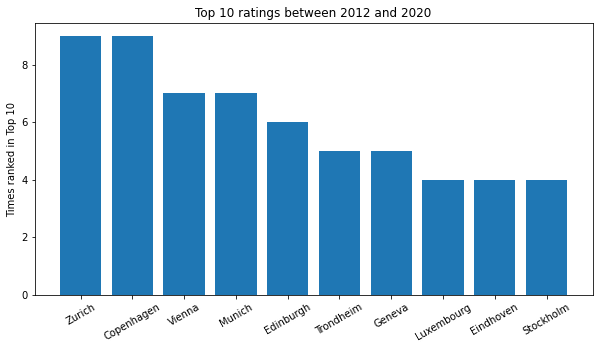

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(x=cities.head(10)["City"],height=cities.head(10)["Top_10"])
plt.title("Top 10 ratings between 2012 and 2020")
plt.ylabel("Times ranked in Top 10")
plt.xticks(rotation=30)
plt.savefig("Top_10_rankings",bbox_inchesstr="tight",pad_inches=1)

Next the top 10 cities by ranking are visualized with their respective ranks over the years.

          City  Top_10
91      Zurich       9
23  Copenhagen       9
85      Vienna       7
56      Munich       7
28   Edinburgh       6
81   Trondheim       5
32      Geneva       5
49  Luxembourg       4
29   Eindhoven       4
74   Stockholm       4


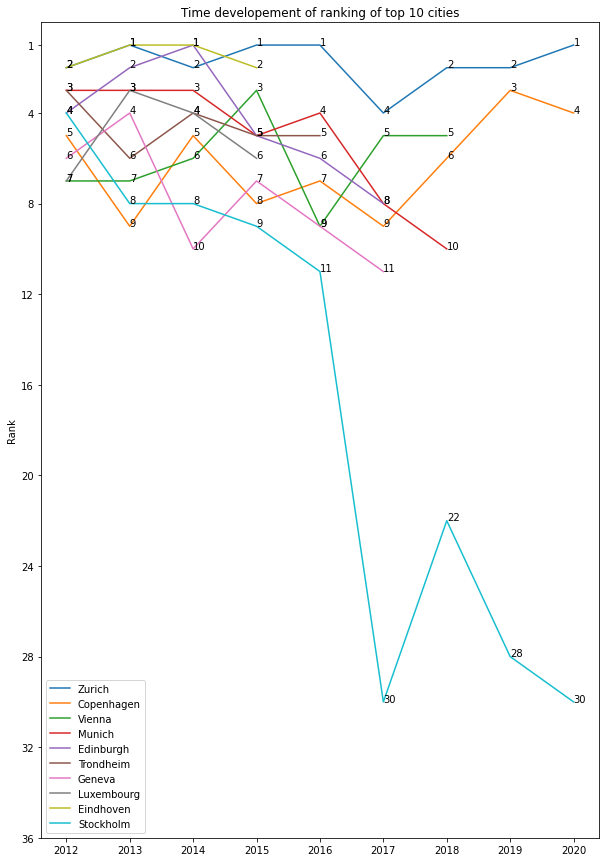

In [4]:
top_10=cities.head(10)
print(top_10)
time_dependency_top_10={}
for city in top_10["City"]:
    time_dependency_top_10[city]=[]
    for year in range(2012,2021):
        d=data[year]
        time_dependency_top_10[city].extend(d[d["City"]==city]["Rank"].to_list())
plt.figure(figsize=(10,15))
for time in time_dependency_top_10.keys():
    p=time_dependency_top_10[time]
    plt.plot(time_dependency_top_10[time])
    for j,i in zip(time_dependency_top_10[time],range(0,9)):
            plt.text(i,j,str(j))
plt.ylim(35,0)
plt.xticks(np.arange(9),("2012","2013","2014","2015","2016","2017","2018","2019","2020"))
plt.yticks((1,4,8,12,16,20,24,28,32,36))
plt.ylabel("Rank")
plt.title("Time developement of ranking of top 10 cities")
plt.legend(top_10["City"])
plt.savefig("Top_10_rankings_ranks")
plt.show()

For further clarity the same time developement was done for the scores of the top 10 cities by ranking.

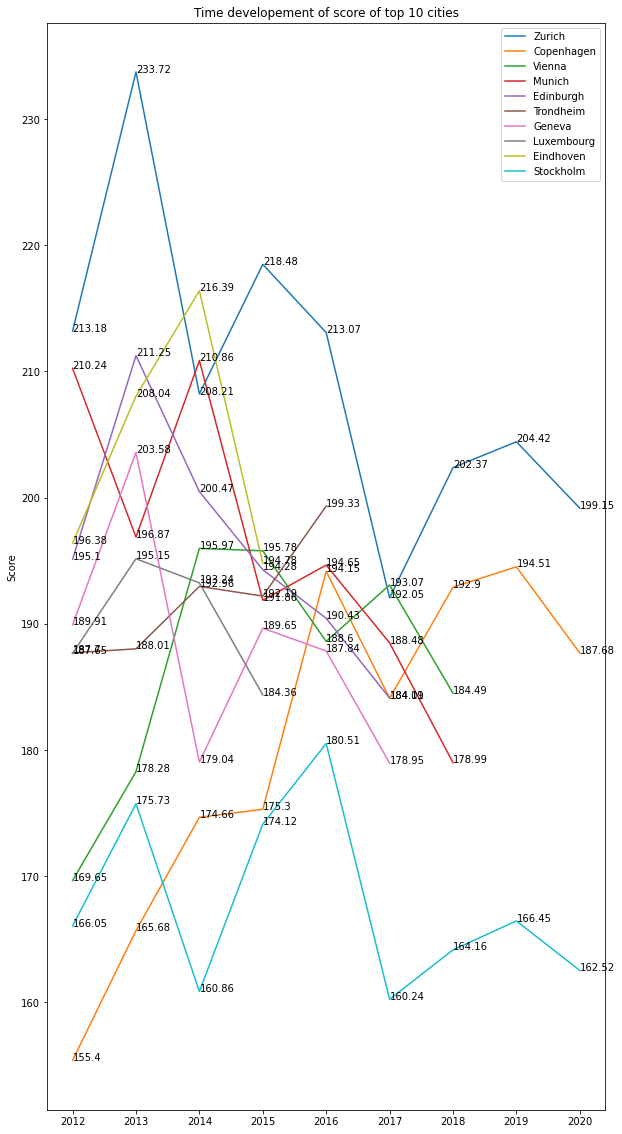

In [5]:
for city in top_10["City"]:
    time_dependency_top_10[city]=[]
    for year in range(2012,2021):
        d=data[year]
        time_dependency_top_10[city].extend(d[d["City"]==city]["Quality of Life Index"].to_list())
plt.figure(figsize=(10,20))
for time in time_dependency_top_10.keys():
    p=time_dependency_top_10[time]
    plt.plot(time_dependency_top_10[time])
    for j,i in zip(time_dependency_top_10[time],range(0,9)):
            plt.text(i,j,str(j))
plt.xticks(np.arange(9),("2012","2013","2014","2015","2016","2017","2018","2019","2020"))
plt.ylabel("Score")
plt.title("Time developement of score of top 10 cities")
plt.legend(top_10["City"])
plt.savefig("Top_10_scores")
plt.show()

# Scores Margin
As it was quite visible from the two graphs above that the rankings and scores do not move in aligned with eachother the next plot shows how the standard deviation changes over time.
From the plot below it can be derived that the difference between two scores which are attributed to two neighboring rankings is become smaller over time. This means that the margin between
scores is become thinner.

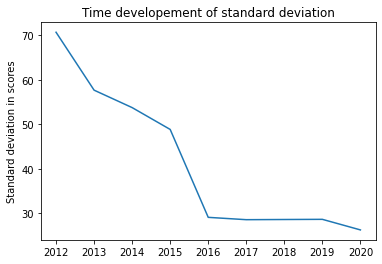

In [6]:
std=[]
for year in range(2012,2021):
    std.append(np.std(data[year]["Quality of Life Index"]))

plt.plot(std)
plt.xticks(np.arange(9),("2012","2013","2014","2015","2016","2017","2018","2019","2020"))
plt.title("Time developement of standard deviation")
plt.ylabel("Standard deviation in scores")
plt.savefig("Standard deviation")
plt.show()

At last we looked at the 10 cities which scored the highest accumulated scores over time. It can be seen that while the top candidates stayed the same the lower end was replaced by different cities.

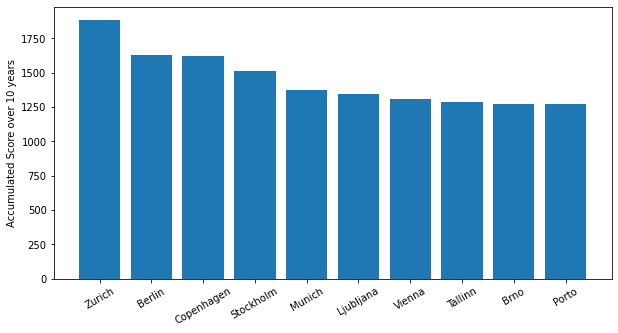

In [7]:
plt.figure(figsize=(10,5))
score_top_10=QOL_acc.sort_values(by="QOL_acc",ascending=False).head(10)
score_top_10.head()
plt.bar(x=score_top_10["City"],height=score_top_10["QOL_acc"])
plt.ylabel("Accumulated Score over 10 years")
plt.xticks(rotation=30)
plt.savefig("top10_scores")
plt.show()

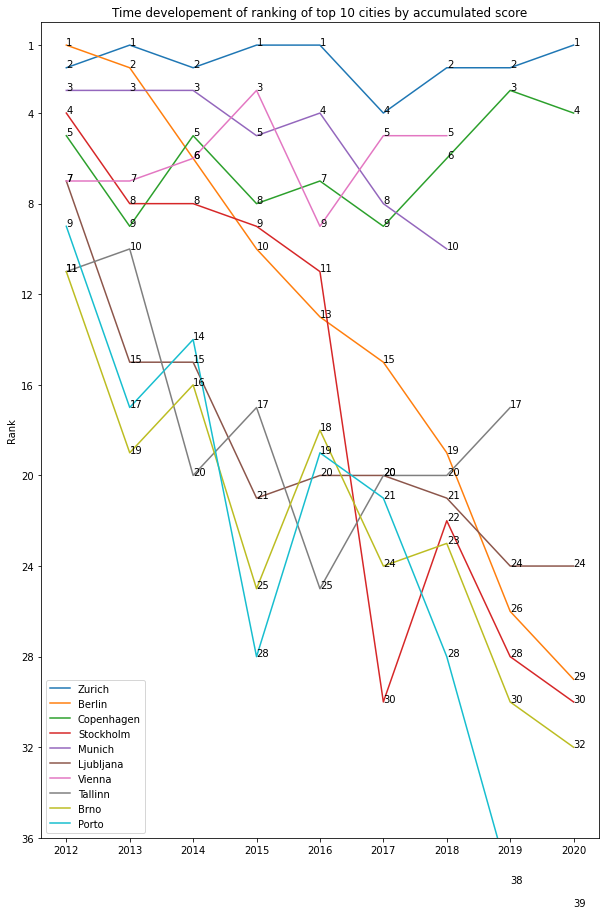

In [8]:
time_dependency_score_acc={}
for city in score_top_10["City"]:
    time_dependency_score_acc[city]=[]
    for year in range(2012,2021):
        d=data[year]
        time_dependency_score_acc[city].extend(d[d["City"]==city]["Rank"].to_list())
plt.figure(figsize=(10,15))
for time in time_dependency_score_acc.keys():
    p=time_dependency_score_acc[time]
    plt.plot(time_dependency_score_acc[time])
    for j,i in zip(time_dependency_score_acc[time],range(0,9)):
            plt.text(i,j,str(j))
plt.ylim(35,0)
plt.xticks(np.arange(9),("2012","2013","2014","2015","2016","2017","2018","2019","2020"))
plt.yticks((1,4,8,12,16,20,24,28,32,36))
plt.ylabel("Rank")
plt.title("Time developement of ranking of top 10 cities by accumulated score")
plt.legend(score_top_10["City"])
plt.savefig("top10_scores_scores")
plt.show()